전이학습 (transfer learnig)
==

다루는 내용
--
- 고양이, 강아지 구분
- 케라스 CNN 모델
- 전이학습

데이터
--
- 이미지 데이터와 모델 파라미터 https://goo.gl/shJ5nw

- 데이터를 다운로드 받은 후 작업 폴더 아래에 data로 복사한다
--
- 압축된 파일을 알집 등으로 푼다
- train.csv 등 이름이 겹치면 새로운 이름으로 변경한다  ->  image-train.csv 등
- 파일을 찾을 때도 탭 키를 사용하면 대상 파일명을 보여준다


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 로드

In [3]:
train = pd.read_csv("data/image-data/image-test.csv")

print(train.shape)
train.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,3.jpg,0
4,4.jpg,1


In [ ]:
test = pd.read_csv("data/image-data/image-test.csv")

print(test.shape)
test.head()

## 이미지 (2000개)

In [ ]:
from matplotlib.pyplot import imread
# from scipy.ndimage import imread

def load_images(filenames, default_path):
    images = []

    for filename in filenames:
        filepath = default_path + filename

        image = imread(filepath)
        images.append(image)

    images = np.array(images)

    return images

In [ ]:
X_train = load_images(train["filename"], "data/image-data/image-train/")
X_train.shape

In [ ]:
X_test = load_images(test["filename"], "data/image-data/image-test/")
X_test.shape

레이블 (0: 고양이, 1:강아지)
--

In [ ]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

In [ ]:
y_test = test["target"].values

print(y_test.shape)
y_test[0:10]

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test[0])
axes[1].imshow(X_test[1])
axes[2].imshow(X_test[2])
axes[3].imshow(X_test[3])
axes[4].imshow(X_test[4])

## 데이터 전처리

### 이미지 크기 변환

In [44]:
import tqdm
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in tqdm(original_images):
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

### 필요시 아래 모듈 설치
- !pip install tqdm


In [15]:
X_train_224 = resize_image(X_train, (224, 224))
X_train_224.shape

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
100%|██████████| 2000/2000 [00:05<00:00, 363.56it/s]


(2000, 224, 224, 3)

In [16]:
X_test_224 = resize_image(X_test, (224, 224))
X_test_224.shape

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
100%|██████████| 2000/2000 [00:05<00:00, 381.19it/s]


(2000, 224, 224, 3)

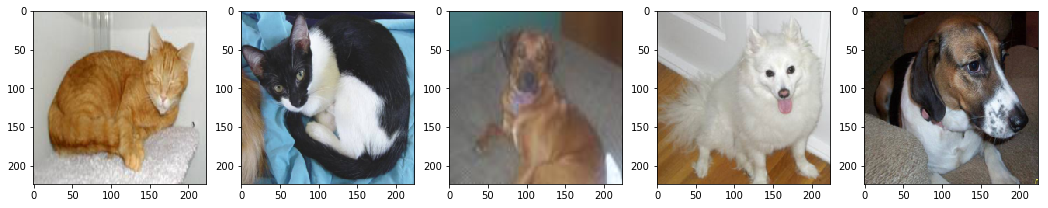

In [45]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train_224[0])
axes[1].imshow(X_train_224[1])
axes[2].imshow(X_train_224[2])
axes[3].imshow(X_train_224[3])
axes[4].imshow(X_train_224[4])

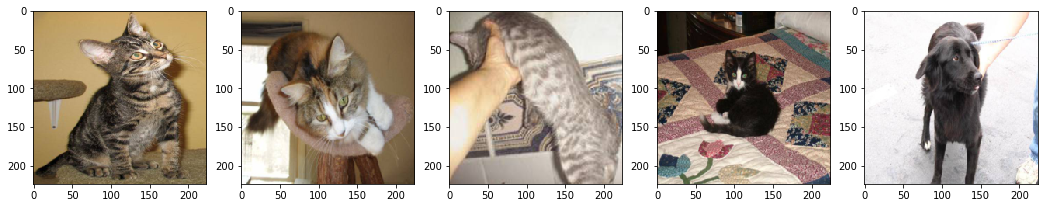

In [18]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test_224[0])
axes[1].imshow(X_test_224[1])
axes[2].imshow(X_test_224[2])
axes[3].imshow(X_test_224[3])
axes[4].imshow(X_test_224[4])

## 케라스 CNN 모델

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=16,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                kernel_initializer = 'he_uniform',
                input_shape = (224, 224, 3)))

model.add(Conv2D(filters=16,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                kernel_initializer = 'he_uniform'))

model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))

model.add(Conv2D(filters=32,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                kernel_initializer = 'he_uniform'))

model.add(Conv2D(filters=32,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                kernel_initializer = 'he_uniform'))

model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))

model.add(Flatten())

model.add(Dense(units = 128,
               activation = 'relu',
               kernel_initializer = 'he_uniform'))

model.add(Dense(units = 1,
               activation = 'sigmoid',
               kernel_initializer = 'glorot_uniform'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
__________

In [31]:
from keras.optimizers import SGD

optimizer = SGD(lr = 0.0001)

model.compile(optimizer = optimizer,
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model.fit(X_train_224,
         y_train,
         epochs = 1)

## VGG-16 사전 학습모델

In [ ]:
!pip install h5py

In [48]:
model = Sequential()

model.add(Conv2D(filters=64,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False,
                input_shape = (224, 224, 3)))

model.add(Conv2D(filters=64,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))

model.add(Conv2D(filters=128,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(Conv2D(filters=128,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))


model.add(Conv2D(filters=256,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(Conv2D(filters=256,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))


model.add(Conv2D(filters=256,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))


model.add(Conv2D(filters=512,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))


model.add(Conv2D(filters=512,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(Conv2D(filters=512,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))


model.add(Conv2D(filters=512,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
               trainable = False))

model.add(Conv2D(filters=512,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(Conv2D(filters=512,
                kernel_size = (3,3),
                activation = 'relu',
                padding = 'same',
                trainable = False))

model.add(MaxPooling2D(pool_size = (2,2),
                      strides = (2,2)))

model.load_weights("data/image-data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

model.add(Flatten())

model.add(Dense(units = 128,
               activation = 'relu',
               kernel_initializer = 'he_uniform'))

model.add(Dense(units = 1,
               activation = 'sigmoid',
               kernel_initializer = 'glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [ ]:
from keras.optimizers import SGD

optimizer = SGD(lr = 0.0001, momentum=0.9)

model.compile(optimizer = optimizer,
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model.fit(X_train_224,
         y_train,
         epochs = 1)